In [1]:
import time
import ROOT
import math
import numpy as np
import pandas as pd
import root_numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.22/02


In [2]:
def getData(inputFiles):
    data = root_numpy.root2array(inputFiles, "Tree", \
                                 branches=['evid','xsec','ntrials','pt_jet', 'p_jet', 'eta_jet', 'phi_jet', 'theta_jet'])
    return pd.DataFrame(data)

In [3]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print (text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [4]:
def toArrayFloat(begin, end, interval=0, log=False, logNum=0):
    array = []
    if log==True:
        array = np.logspace(begin, end, num=logNum)
    else:
        length = int((end - begin) / interval + 1)
        for i in range(0,length):
            array.append((float(begin + interval * i))) 
    return array

In [5]:
def getInterval(arrayFloat):
    interval = np.zeros(len(arrayFloat)-1)
    for i in range(0,len(arrayFloat)-1):
        interval[i] = arrayFloat[i+1] - arrayFloat[i]
    return interval

In [6]:
def getHist(df, var, binEdges):
        
    x = []
    for i in range(0,len(binEdges)-1):
        x.append((binEdges[i] + binEdges[i+1]) / 2)
    
    y = np.histogram(df[var], bins=binEdges)[0]
    
    xerr = getInterval(binEdges)/2
    
    yerr = np.sqrt(y)
    
    return x, y, xerr, yerr

In [7]:
def keepOneJet(inputDataframe):    
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.loc[~dataframe['evid'].duplicated(keep='first')]
    print ('\n','Remove extra jets',cutDataframe.shape[0],' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [8]:
def flattenDf(a):
    pt_array = np.hstack(np.asarray(a['pt_jet']))
    eta_array = np.hstack(np.asarray(a['eta_jet']))
    d = {'pt_jet': pt_array, 'eta_jet': eta_array}
    df = pd.DataFrame(data=d)
    df
    return df

In [9]:
file1 = ['$HOME/output/main.root']

In [10]:
a = getData(file1)

In [11]:
a

,evid,xsec,ntrials,pt_jet,p_jet,eta_jet,phi_jet,theta_jet
0,0,5.205378,1,[],[],[],[],[]
1,1,37.850784,2,"[2.201913, 0.29578567, 0.9773209, 0.7681313, 0...","[32.823925, 3.887846, 12.212997, 4.591309, 2.3...","[-3.3938513, -3.2676725, -3.2169833, -2.474034...","[6.23342, 3.69009, 5.5482874, 2.385043, 4.8357...","[3.0744598, 3.0654395, 3.061484, 2.973501, 2.9..."
2,2,37.850784,3,"[1.6465796, 0.27085885, 0.48814473, 0.4998024,...","[14.38167, 2.2402294, 3.7687087, 3.247805, 1.5...","[-2.857108, -2.802208, -2.7328022, -2.5586953,...","[3.6834486, 0.023993153, 1.520591, 5.428285, 2...","[3.0268495, 3.0203893, 3.011702, 2.9870894, 2...."
3,3,37.850784,4,"[0.9102772, 0.82021517, 0.42095256, 0.515329, ...","[14.741579, 10.742817, 4.815067, 5.983839, 15....","[-3.4768708, -3.2641125, -3.128216, -3.1432998...","[2.896294, 4.9733853, 4.291181, 0.6668749, 1.4...","[3.0798044, 3.0651681, 3.054057, 3.0553658, 3...."
4,4,42.950375,5,"[0.3276816, 0.39279422, 0.6722541, 0.26302376,...","[0.33303684, 0.4067837, 0.76470613, 0.8013649,...","[0.18054634, 0.26610467, 0.51862115, 1.779129,...","[2.213621, 0.44291025, 4.5796113, 2.6460323, 2...","[1.391223, 1.3077778, 1.0739732, 0.3344183, 0...."
...,...,...,...,...,...,...,...,...
9999995,9999995,48.049965,9999996,"[0.7776813, 0.22989054, 0.5844519, 0.765267, 0...","[11.1556225, 1.8002781, 3.8625216, 3.3814282, ...","[-3.355312, -2.7471385, -2.5757744, -2.165918,...","[1.7558124, 3.1974523, 2.6087239, 5.895424, 2....","[3.071824, 3.0135458, 2.9896955, 2.9133, 2.464..."
9999996,9999996,48.049965,9999997,[],[],[],[],[]
9999997,9999997,48.049965,9999998,"[0.55437016, 0.6537371, 1.463661, 0.9613081, 0...","[7.058883, 8.062139, 17.1352, 8.66796, 3.15630...","[-3.2358112, -3.203728, -3.1515121, -2.8891518...","[1.4067961, 0.53279525, 5.2454696, 2.7656682, ...","[3.0629766, 3.0604162, 3.05607, 3.0304604, 3.0..."
9999998,9999998,48.049965,9999999,"[0.33274403, 0.62095946, 0.53932387, 0.2804743...","[3.6669955, 1.1118023, 0.88071144, 0.30665207,...","[-3.0908368, -1.1865112, -1.0729473, -0.428758...","[4.2063203, 2.0468948, 4.2278347, 2.179225, 4....","[3.0507274, 2.548997, 2.482534, 1.9869915, 1.2..."


In [12]:
b = flattenDf(a)

In [13]:
b

,pt_jet,eta_jet
0,2.201913,-3.393851
1,0.295786,-3.267673
2,0.977321,-3.216983
3,0.768131,-2.474035
4,0.415331,-2.437051
...,...,...
185227696,0.567744,1.912783
185227697,0.218687,2.425348
185227698,0.646266,2.844842
185227699,0.693709,3.141803


In [14]:
df1 = applyCut(b, 'abs(eta_jet) < 0.5', 'abs(eta) < 0.5')
df2 = applyCut(b, '0.5 < abs(eta_jet) < 0.9', '0.5 < abs(eta) < 0.9')
df3 = applyCut(b, '3.0 < eta_jet < 3.5', '3.0 < eta < 3.5')

abs(eta) < 0.5 26044817  fraction kept: 14.1
0.5 < abs(eta) < 0.9 21220504  fraction kept: 11.5
3.0 < eta < 3.5 12078845  fraction kept: 6.5


In [15]:
print(min(df3['eta_jet']), max(df3['eta_jet']), max(df3['pt_jet']))

3.000000238418579 3.499999761581421 13.620253562927246


In [16]:
xvar_array = toArrayFloat(0.95, 1.90, 0, log=True, logNum=11)
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]
x1, y1, xerr, yerr1 = getHist(df1, 'pt_jet', xvar_array)
x2, y2, xerr, yerr2 = getHist(df2, 'pt_jet', xvar_array)
x3, y3, xerr, yerr3 = getHist(df3, 'pt_jet', xvar_array)

Text(65, 5, '$\\sqrt{s} = 510 \\, \\mathrm{GeV}$ \n R = 0.5')

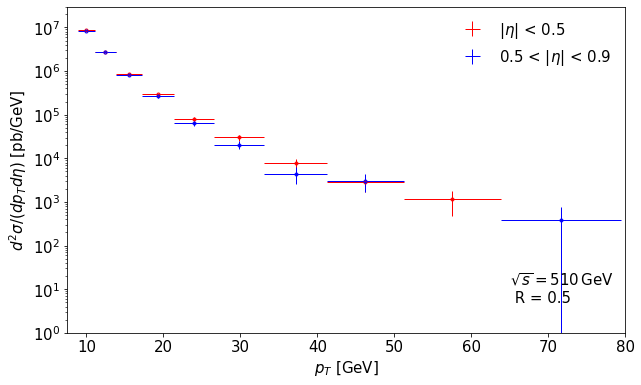

In [17]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(x1, y1*xsec*1e9/(2*ntrials*xerr*1), xerr = xerr, yerr = yerr1*xsec*1e9/(2*ntrials*xerr*1),\
             fmt='none', color='r', elinewidth=1, label='|$\eta$| < 0.5')
plt.plot(x1, y1*xsec*1e9/(2*ntrials*xerr*1), 'r.', fillstyle='none')
plt.errorbar(x2, y2*xsec*1e9/(2*ntrials*xerr*0.8), xerr = xerr, yerr = yerr2*xsec*1e9/(2*ntrials*xerr*0.8),\
             fmt='none', color='b', elinewidth=1, label='0.5 < |$\eta$| < 0.9')
plt.plot(x2, y2*xsec*1e9/(2*ntrials*xerr*0.8), 'b.', fillstyle='none')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('$p_T$ [GeV]', fontsize=15)
plt.ylabel(r'$d^2 \sigma / (dp_T d \eta)$ [pb/GeV]', fontsize=15)
plt.xlim(left=7.5, right=80)
plt.ylim(top=3e7, bottom=1)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(65,5,'$\sqrt{s} = 510 \, \mathrm{GeV}$ \n R = 0.5', fontsize=15)

Text(25, 5, '$\\sqrt{s} = 510 \\, \\mathrm{GeV}$ \n R = 0.5')

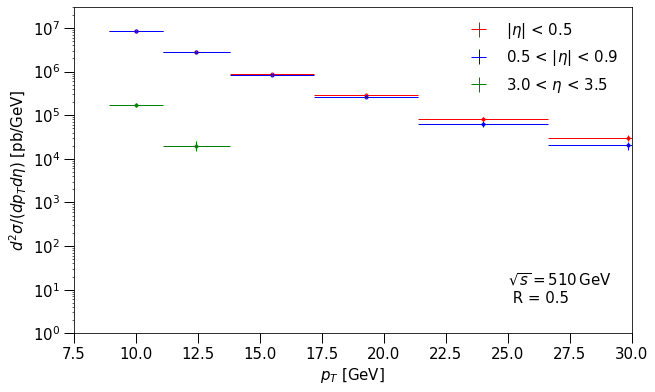

In [18]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(x1, y1*xsec*1e9/(2*ntrials*xerr*1), xerr = xerr, yerr = yerr1*xsec*1e9/(2*ntrials*xerr*1),\
             fmt='none', color='r', elinewidth=1, label='|$\eta$| < 0.5')
plt.plot(x1, y1*xsec*1e9/(2*ntrials*xerr*1), 'r.', fillstyle='none')
plt.errorbar(x2, y2*xsec*1e9/(2*ntrials*xerr*0.8), xerr = xerr, yerr = yerr2*xsec*1e9/(2*ntrials*xerr*0.8),\
             fmt='none', color='b', elinewidth=1, label='0.5 < |$\eta$| < 0.9')
plt.plot(x2, y2*xsec*1e9/(2*ntrials*xerr*0.8), 'b.', fillstyle='none')
plt.errorbar(x3, y3*xsec*1e9/(2*ntrials*xerr*1.5), xerr = xerr, yerr = yerr3*xsec*1e9/(2*ntrials*xerr*1.5),\
             fmt='none', color='g', elinewidth=1, label='3.0 < $\eta$ < 3.5')
plt.plot(x3, y3*xsec*1e9/(2*ntrials*xerr*1.5), 'g.', fillstyle='none')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params('both', length=10, width=1, which='major')
plt.yscale('log')
plt.xlabel('$p_T$ [GeV]', fontsize=15)
plt.ylabel(r'$d^2 \sigma / (dp_T d \eta)$ [pb/GeV]', fontsize=15)
plt.xlim(left=7.5, right=30)
plt.ylim(top=3e7, bottom=1)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(25,5,'$\sqrt{s} = 510 \, \mathrm{GeV}$ \n R = 0.5', fontsize=15)

In [19]:
xvar_array = toArrayFloat(0.30, 1.50, 0, log=True, logNum=11)
x3, y3, xerr, yerr3 = getHist(df3, 'pt_jet', xvar_array)

Text(12, 10000.0, '$\\sqrt{s} = 510 \\, \\mathrm{GeV}$ \n R = 0.5')

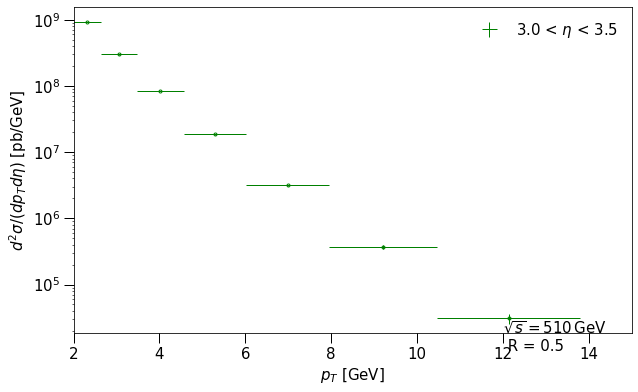

In [20]:
fig = plt.figure(figsize=(10,6))
plt.errorbar(x3, y3*xsec*1e9/(2*ntrials*xerr*1.5), xerr = xerr, yerr = yerr3*xsec*1e9/(2*ntrials*xerr*1.5),\
             fmt='none', color='g', elinewidth=1, label='3.0 < $\eta$ < 3.5')
plt.plot(x3, y3*xsec*1e9/(2*ntrials*xerr*1.5), 'g.', fillstyle='none')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params('both', length=10, width=1, which='major')
plt.yscale('log')
plt.xlabel('$p_T$ [GeV]', fontsize=15)
plt.ylabel(r'$d^2 \sigma / (dp_T d \eta)$ [pb/GeV]', fontsize=15)
plt.xlim(left=2.0, right=15)
#plt.ylim(top=3e7, bottom=1)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.text(12,1e4,'$\sqrt{s} = 510 \, \mathrm{GeV}$ \n R = 0.5', fontsize=15)